In [1]:
# !pip install transformers torch accelerate

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/c1/bd/f64d67df4d3b05a460f281defe830ffab6d7940b7ca98ec085e94e024781/transformers-4.34.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/6d/13/b5e8bacd980b2195f8a1741ce11cbb9146568607795d5e4ff510dcff1064/torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/d0/cf/364d550af711b5abe5129ac676896b223ba5a082d97fe400527a59c0c1f8/accelerate-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/5e/5d/97afbafd9d584ff1b45fcb354a479a3609bd97f912f8f1f6c563cb1fae21/filelock-3.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.16.4 from https://files.py

In [3]:
# access to the model on Hugging Face
from huggingface_hub import notebook_login

notebook_login()

In [4]:
!huggingface-cli whoami

e133759


In [5]:
# Loading Model & Tokenizer
# Here, we are preparing our session by loading both the Llama model and its associated tokenizer.
# The tokenizer will help in converting our text prompts into a format that the model can understand and process.
from transformers import AutoTokenizer
import transformers
import torch

model = "meta-llama/Llama-2-7b-chat-hf" # meta-llama/Llama-2-7b-hf

tokenizer = AutoTokenizer.from_pretrained(model, use_auth_token=True)

/srv/conda/envs/notebook/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py:655: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [6]:
# Creating the Llama Pipeline
from transformers import pipeline

llama_pipeline = pipeline(
    "text-generation",  # LLM task
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
# !pip install ucimlrepo pandas numpy seaborn plotly matplotlib
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b5/24/aaccf324ce862bb82277e8814d2aebbb2a2c160d04e95aa2b8c9dc3137a9/matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/f1/6b/e4b0f8708f22dd7c321f87eadbb98708975e

In [17]:
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
# DataFrame
merged_df = X.join(y)

threshold = 0.1 * len(merged_df)  # Calculate the threshold of missing values

# Filter columns with more than 30% missing values
filtered_columns = merged_df.columns[merged_df.isna().sum() <= threshold]

# Create a new DataFrame with the filtered columns
df_filtered = merged_df[filtered_columns]
df_filtered.dropna(axis=0, how='any', inplace=True)
bin_edges = [25, 38, 55, 70, 100]
bin_labels = [1, 2, 3, 4]

# Use cut() to create categorical groups and assign back to 'AGE'
df_filtered['CategoricalColumn'] = pd.cut(df_filtered['AGE'], bins=bin_edges, labels=bin_labels)
df_filtered['AGE'] = df_filtered['CategoricalColumn']

# Drop the 'CategoricalColumn' to keep only the categorical 'AGE'
df_filtered = df_filtered.drop(columns=['CategoricalColumn'])


df_filtered.head(3)

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  ZSN_A  \
0   4    1       2.0        1.0        1.0       2.0  3.0         0.0    0.0   
1   2    1       1.0        0.0        0.0       0.0  0.0         0.0    0.0   
2   2    1       0.0        0.0        0.0       2.0  2.0         0.0    0.0   

   nr_11  nr_01  nr_02  nr_03  nr_04  nr_07  nr_08  np_01  np_04  np_05  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   np_07  np_08  np_09  np_10  endocr_01  endocr_02  endocr_03  zab_leg_01  \
0    0.0    0.0    0.0    0.0        0.0        0.0        0.0         0.0   
1    0.0    0.0    0.0    0.0        0.0        0.0        0.0         0.0   
2    0.0    0.0    0.0    0.0        0.0        0.0        0.0         0.0   

   zab_leg_02  zab_leg_03  zab_leg_04  zab_leg_06  O_L_POST  K_SH_POST  \
0         0.0         0.0         0.0         0.0       0.0        0.0   
1         0.0         0.0         0.0         0.0       0.0        0.0   
2         0.0         0.0         0.0         0.0       0.0        0.0   

   MP_TP_POST  SVT_POST  GT_POST  FIB_G_POST  ant_im  lat_im  inf_im  post_im  \
0         0.0       0.0      0.0         0.0     1.0     0.0     0.0      0.0   
1         0.0       0.0      0.0         0.0     4.0     1.0     0.0      0.0   
2         0.0       0.0      0.0         0.0     4.0     1.0     0.0      0.0   

   IM_PG_P  ritm_ecg_p_01  ritm_ecg_p_02  ritm_ecg_p_04  ritm_ecg_p_06  \
0      0.0            0.0            0.0            0.0            0.0   
1      0.0            1.0            0.0            0.0            0.0   
2      0.0            1.0            0.0            0.0            0.0   

   ritm_ecg_p_07  ritm_ecg_p_08  n_r_ecg_p_01  n_r_ecg_p_02  n_r_ecg_p_03  \
0            1.0            0.0           0.0           0.0           0.0   
1            0.0            0.0           0.0           0.0           0.0   
2            0.0            0.0           0.0           0.0           1.0   

   n_r_ecg_p_04  n_r_ecg_p_05  n_r_ecg_p_06  n_r_ecg_p_08  n_r_ecg_p_09  \
0           0.0           1.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   

   n_r_ecg_p_10  n_p_ecg_p_01  n_p_ecg_p_03  n_p_ecg_p_04  n_p_ecg_p_05  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   

   n_p_ecg_p_06  n_p_ecg_p_07  n_p_ecg_p_08  n_p_ecg_p_09  n_p_ecg_p_10  \
0           0.0           0.0           1.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   

   n_p_ecg_p_11  n_p_ecg_p_12  fibr_ter_01  fibr_ter_02  fibr_ter_03  \
0           0.0           0.0          0.0          0.0          0.0   
1           0.0           0.0          0.0          0.0          0.0   
2           0.0           0.0          0.0          0.0          0.0   

   fibr_ter_05  fibr_ter_06  fibr_ter_07  fibr_ter_08  L_BLOOD  TIME_B_S  \
0          0.0          0.0          0.0          0.0      8.0       4.0   
1          0.0          0.0          0.0          0.0      7.8       2.0   
2          0.0          0.0          0.0          0.0     10.8       3.0   

   R_AB_1_n  R_AB_2_n  R_AB_3_n  NITR_S  NA_R_1_n  NA_R_2_n  NA_R_3_n  \
0       0.0       0.0       1.0     0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0     0.0       0.0       0.0       0.0   
2       3.0       0.0       0.0     0.0       1.0       0.0       0.0   

   NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  B

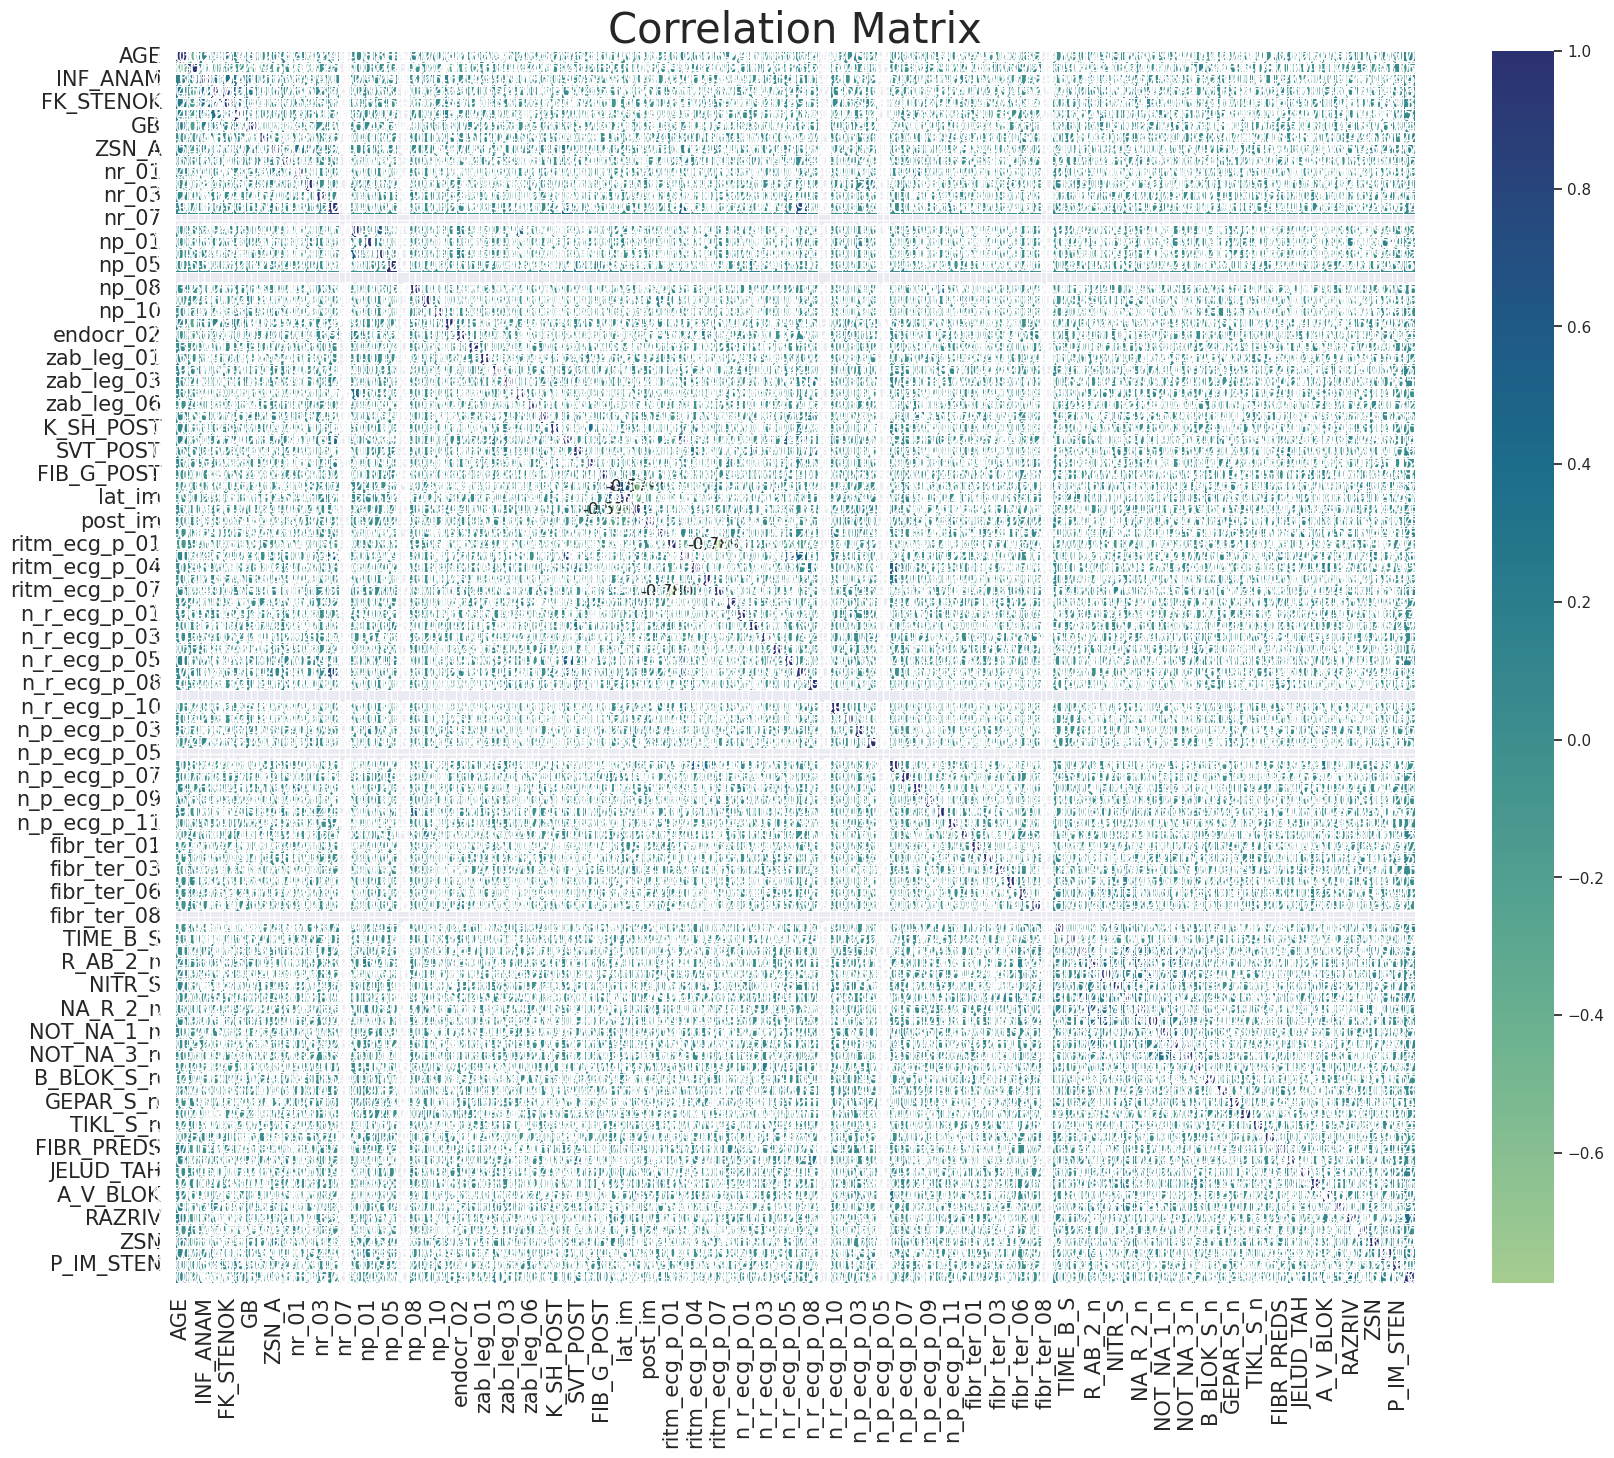

In [18]:

# Calculate the correlation matrix
# data=scaled_features
corr_matrix = df_filtered.corr()

# Create figure object and set size
fig, ax = plt.subplots(figsize=(20, 16))
# Set font size
sns.set(font_scale=1)
# Create heatmap
sns.heatmap(corr_matrix, cmap="crest", center=None, linecolor='white', 
            annot=True, fmt=".4f", linewidth=.5)


plt.xticks(fontsize=15, fontweight='normal')
plt.yticks(fontsize=15, fontweight='normal')

# Set font properties for title
plt.title('Correlation Matrix', fontsize=30)

# Show plot
plt.show()

In [19]:
stacked_corr = corr_matrix.stack()

# Exclude diagonal entries (correlation of a variable with itself)
stacked_corr = stacked_corr[stacked_corr.index.get_level_values(0) != stacked_corr.index.get_level_values(1)]

# Get the top 20 correlations
top_20_corr = stacked_corr.abs().nlargest(20)

print(top_20_corr)

ritm_ecg_p_01  ritm_ecg_p_07    0.789149
ritm_ecg_p_07  ritm_ecg_p_01    0.789149
MP_TP_POST     ritm_ecg_p_02    0.786896
ritm_ecg_p_02  MP_TP_POST       0.786896
STENOK_AN      FK_STENOK        0.753537
FK_STENOK      STENOK_AN        0.753537
nr_04          n_r_ecg_p_06     0.710512
n_r_ecg_p_06   nr_04            0.710512
R_AB_2_n       NA_R_2_n         0.649755
NA_R_2_n       R_AB_2_n         0.649755
ritm_ecg_p_02  n_r_ecg_p_05     0.625440
n_r_ecg_p_05   ritm_ecg_p_02    0.625440
NOT_NA_2_n     NOT_NA_3_n       0.598637
NOT_NA_3_n     NOT_NA_2_n       0.598637
R_AB_3_n       NA_R_3_n         0.595045
NA_R_3_n       R_AB_3_n         0.595045
ant_im         lat_im           0.585203
lat_im         ant_im           0.585203
ant_im         inf_im           0.579493
inf_im         ant_im           0.579493
dtype: float64


In [24]:
!pip install sklearn scikit-learn
from sklearn.linear_model import BayesianRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV




In [34]:
# Define the parameter grid with different threshold values
param_grid = {'threshold': [0.02,0.03,0.05,0.08,0.1, 0.2, 0.3]}
X = df_filtered.loc[:, df_filtered.columns != 'LET_IS']
y = df_filtered['LET_IS']
# Create the Bayesian Ridge Regression model
model = BayesianRidge()

# Create the grid search object
grid_search = GridSearchCV(SelectFromModel(model), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X,  y)

# Get the best threshold value
best_threshold = grid_search.best_params_['threshold']
best_threshold

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/s

0.03

In [74]:
# Create a Bayesian Ridge Regression model
model = BayesianRidge()

# Select relevant features based on a threshold
sfm = SelectFromModel(model, threshold=best_threshold)
sfm.fit(X, y)

# Get the selected features
selected_features = X.columns[sfm.get_support()]
selected_features

Index(['AGE', 'INF_ANAM', 'FK_STENOK', 'IBS_POST', 'SIM_GIPERT', 'ZSN_A',
       'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_08', 'np_04', 'np_05',
       'np_08', 'np_09', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'O_L_POST', 'K_SH_POST',
       'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im',
       'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_04',
       'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
       'n_r_ecg_p_08', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_06',
       'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_12', 'fibr_ter_01',
       'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06',
       'fibr_ter_07', 'R_AB_1_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n',
       'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'ASP_S_n', 'TIKL_S_n', 'TREN

In [43]:

# !pip install --upgrade pgmpy scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/18/44/7e8d208eb59a8224fcc474415104f13be9b378be8da63f76dfde12ec2b44/scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.3 which is incompatible.


In [81]:

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import BicScore
from pgmpy.estimators import HillClimbSearch



In [77]:
# final selected features
selected_features1 = selected_features.tolist()
# selected_features = [word[:-6] for word in selected_features]
selected_features1.append('LET_IS')
selected_features

Index(['AGE', 'INF_ANAM', 'FK_STENOK', 'IBS_POST', 'SIM_GIPERT', 'ZSN_A',
       'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_08', 'np_04', 'np_05',
       'np_08', 'np_09', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'O_L_POST', 'K_SH_POST',
       'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im',
       'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_04',
       'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
       'n_r_ecg_p_08', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_06',
       'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_12', 'fibr_ter_01',
       'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06',
       'fibr_ter_07', 'R_AB_1_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n',
       'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'ASP_S_n', 'TIKL_S_n', 'TREN

In [78]:
# Create an empty Bayesian Network

data = df_filtered[selected_features]
data.head(3)

AGE  INF_ANAM  FK_STENOK  IBS_POST  SIM_GIPERT  ZSN_A  nr_11  nr_01  nr_02  \
0   4       2.0        1.0       2.0         0.0    0.0    0.0    0.0    0.0   
1   2       1.0        0.0       0.0         0.0    0.0    0.0    0.0    0.0   
2   2       0.0        0.0       2.0         0.0    0.0    0.0    0.0    0.0   

   nr_03  nr_04  nr_08  np_04  np_05  np_08  np_09  endocr_01  endocr_02  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0        0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0        0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0        0.0        0.0   

   endocr_03  zab_leg_01  zab_leg_02  zab_leg_03  zab_leg_04  O_L_POST  \
0        0.0         0.0         0.0         0.0         0.0       0.0   
1        0.0         0.0         0.0         0.0         0.0       0.0   
2        0.0         0.0         0.0         0.0         0.0       0.0   

   K_SH_POST  MP_TP_POST  SVT_POST  GT_POST  FIB_G_POST  ant_im  lat_im  \
0        0.0         0.0       0.0      0.0         0.0     1.0     0.0   
1        0.0         0.0       0.0      0.0         0.0     4.0     1.0   
2        0.0         0.0       0.0      0.0         0.0     4.0     1.0   

   inf_im  post_im  IM_PG_P  ritm_ecg_p_01  ritm_ecg_p_04  ritm_ecg_p_06  \
0     0.0      0.0      0.0            0.0            0.0            0.0   
1     0.0      0.0      0.0            1.0            0.0            0.0   
2     0.0      0.0      0.0            1.0            0.0            0.0   

   ritm_ecg_p_07  ritm_ecg_p_08  n_r_ecg_p_01  n_r_ecg_p_02  n_r_ecg_p_03  \
0            1.0            0.0           0.0           0.0           0.0   
1            0.0            0.0           0.0           0.0           0.0   
2            0.0            0.0           0.0           0.0           1.0   

   n_r_ecg_p_05  n_r_ecg_p_06  n_r_ecg_p_08  n_r_ecg_p_10  n_p_ecg_p_01  \
0           1.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   

   n_p_ecg_p_06  n_p_ecg_p_08  n_p_ecg_p_09  n_p_ecg_p_12  fibr_ter_01  \
0           0.0           1.0           0.0           0.0          0.0   
1           0.0           0.0           0.0           0.0          0.0   
2           0.0           0.0           0.0           0.0          0.0   

   fibr_ter_02  fibr_ter_03  fibr_ter_05  fibr_ter_06  fibr_ter_07  R_AB_1_n  \
0          0.0          0.0          0.0          0.0          0.0       0.0   
1          0.0          0.0          0.0          0.0          0.0       0.0   
2          0.0          0.0          0.0          0.0          0.0       3.0   

   R_AB_3_n  NA_R_1_n  NA_R_2_n  NA_R_3_n  NOT_NA_1_n  NOT_NA_2_n  LID_S_n  \
0       1.0       0.0       0.0       0.0         0.0         0.0      1.0   
1       0.0       0.0       0.0       0.0         1.0         0.0      1.0   
2       0.0       1.0       0.0       0.0         3.0         2.0      1.0   

   B_BLOK_S_n  ANT_CA_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  FIBR_PREDS  \
0         0.0         0.0      1.0       0.0        0.0           0   
1         0.0         1.0      1.0       0.0        1.0           0   
2         1.0         0.0      1.0       0.0        0.0           0   

   JELUD_TAH  FIBR_JELUD  A_V_BLOK  RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  
0          0           0         0       0         0    0       0          0  
1          0           0         0       0         0    0       0          0  
2          0           0         0       0         0    0       0          0

In [107]:
# Instantiate a HillClimbSearch object
hc = HillClimbSearch(data)

# Learn the structure using the BIC scoring method in the estimate method
best_model = hc.estimate(scoring_method=BicScore(data))

# Once you have the best model, you can add the edges to your Bayesian Network
model = BayesianNetwork()
model.add_edges_from(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

/srv/conda/envs/notebook/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/srv/conda/envs/notebook/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/srv/conda/envs/notebook/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

In [108]:
for edge in model.edges():
    print(edge)

('AGE', 'fibr_ter_03')
('fibr_ter_03', 'DRESSLER')
('FK_STENOK', 'IBS_POST')
('IBS_POST', 'INF_ANAM')
('IBS_POST', 'endocr_01')
('endocr_01', 'endocr_02')
('endocr_01', 'ritm_ecg_p_07')
('ZSN_A', 'ZSN')
('nr_01', 'n_p_ecg_p_08')
('nr_08', 'np_04')
('nr_08', 'zab_leg_04')
('endocr_02', 'n_p_ecg_p_01')
('ritm_ecg_p_07', 'ritm_ecg_p_01')
('ritm_ecg_p_07', 'O_L_POST')
('ritm_ecg_p_07', 'ritm_ecg_p_08')
('O_L_POST', 'SVT_POST')
('SVT_POST', 'n_r_ecg_p_08')
('SVT_POST', 'n_r_ecg_p_02')
('MP_TP_POST', 'ritm_ecg_p_01')
('MP_TP_POST', 'n_r_ecg_p_05')
('MP_TP_POST', 'n_r_ecg_p_06')
('MP_TP_POST', 'nr_04')
('MP_TP_POST', 'zab_leg_02')
('ritm_ecg_p_01', 'ZSN_A')
('n_r_ecg_p_05', 'FIBR_PREDS')
('n_r_ecg_p_06', 'nr_04')
('n_r_ecg_p_06', 'n_r_ecg_p_05')
('n_r_ecg_p_08', 'ritm_ecg_p_04')
('n_r_ecg_p_08', 'zab_leg_03')
('GT_POST', 'K_SH_POST')
('ant_im', 'lat_im')
('ant_im', 'post_im')
('inf_im', 'ant_im')
('IM_PG_P', 'MP_TP_POST')
('IM_PG_P', 'np_09')
('IM_PG_P', 'n_r_ecg_p_10')
('ritm_ecg_p_04', 'n_p

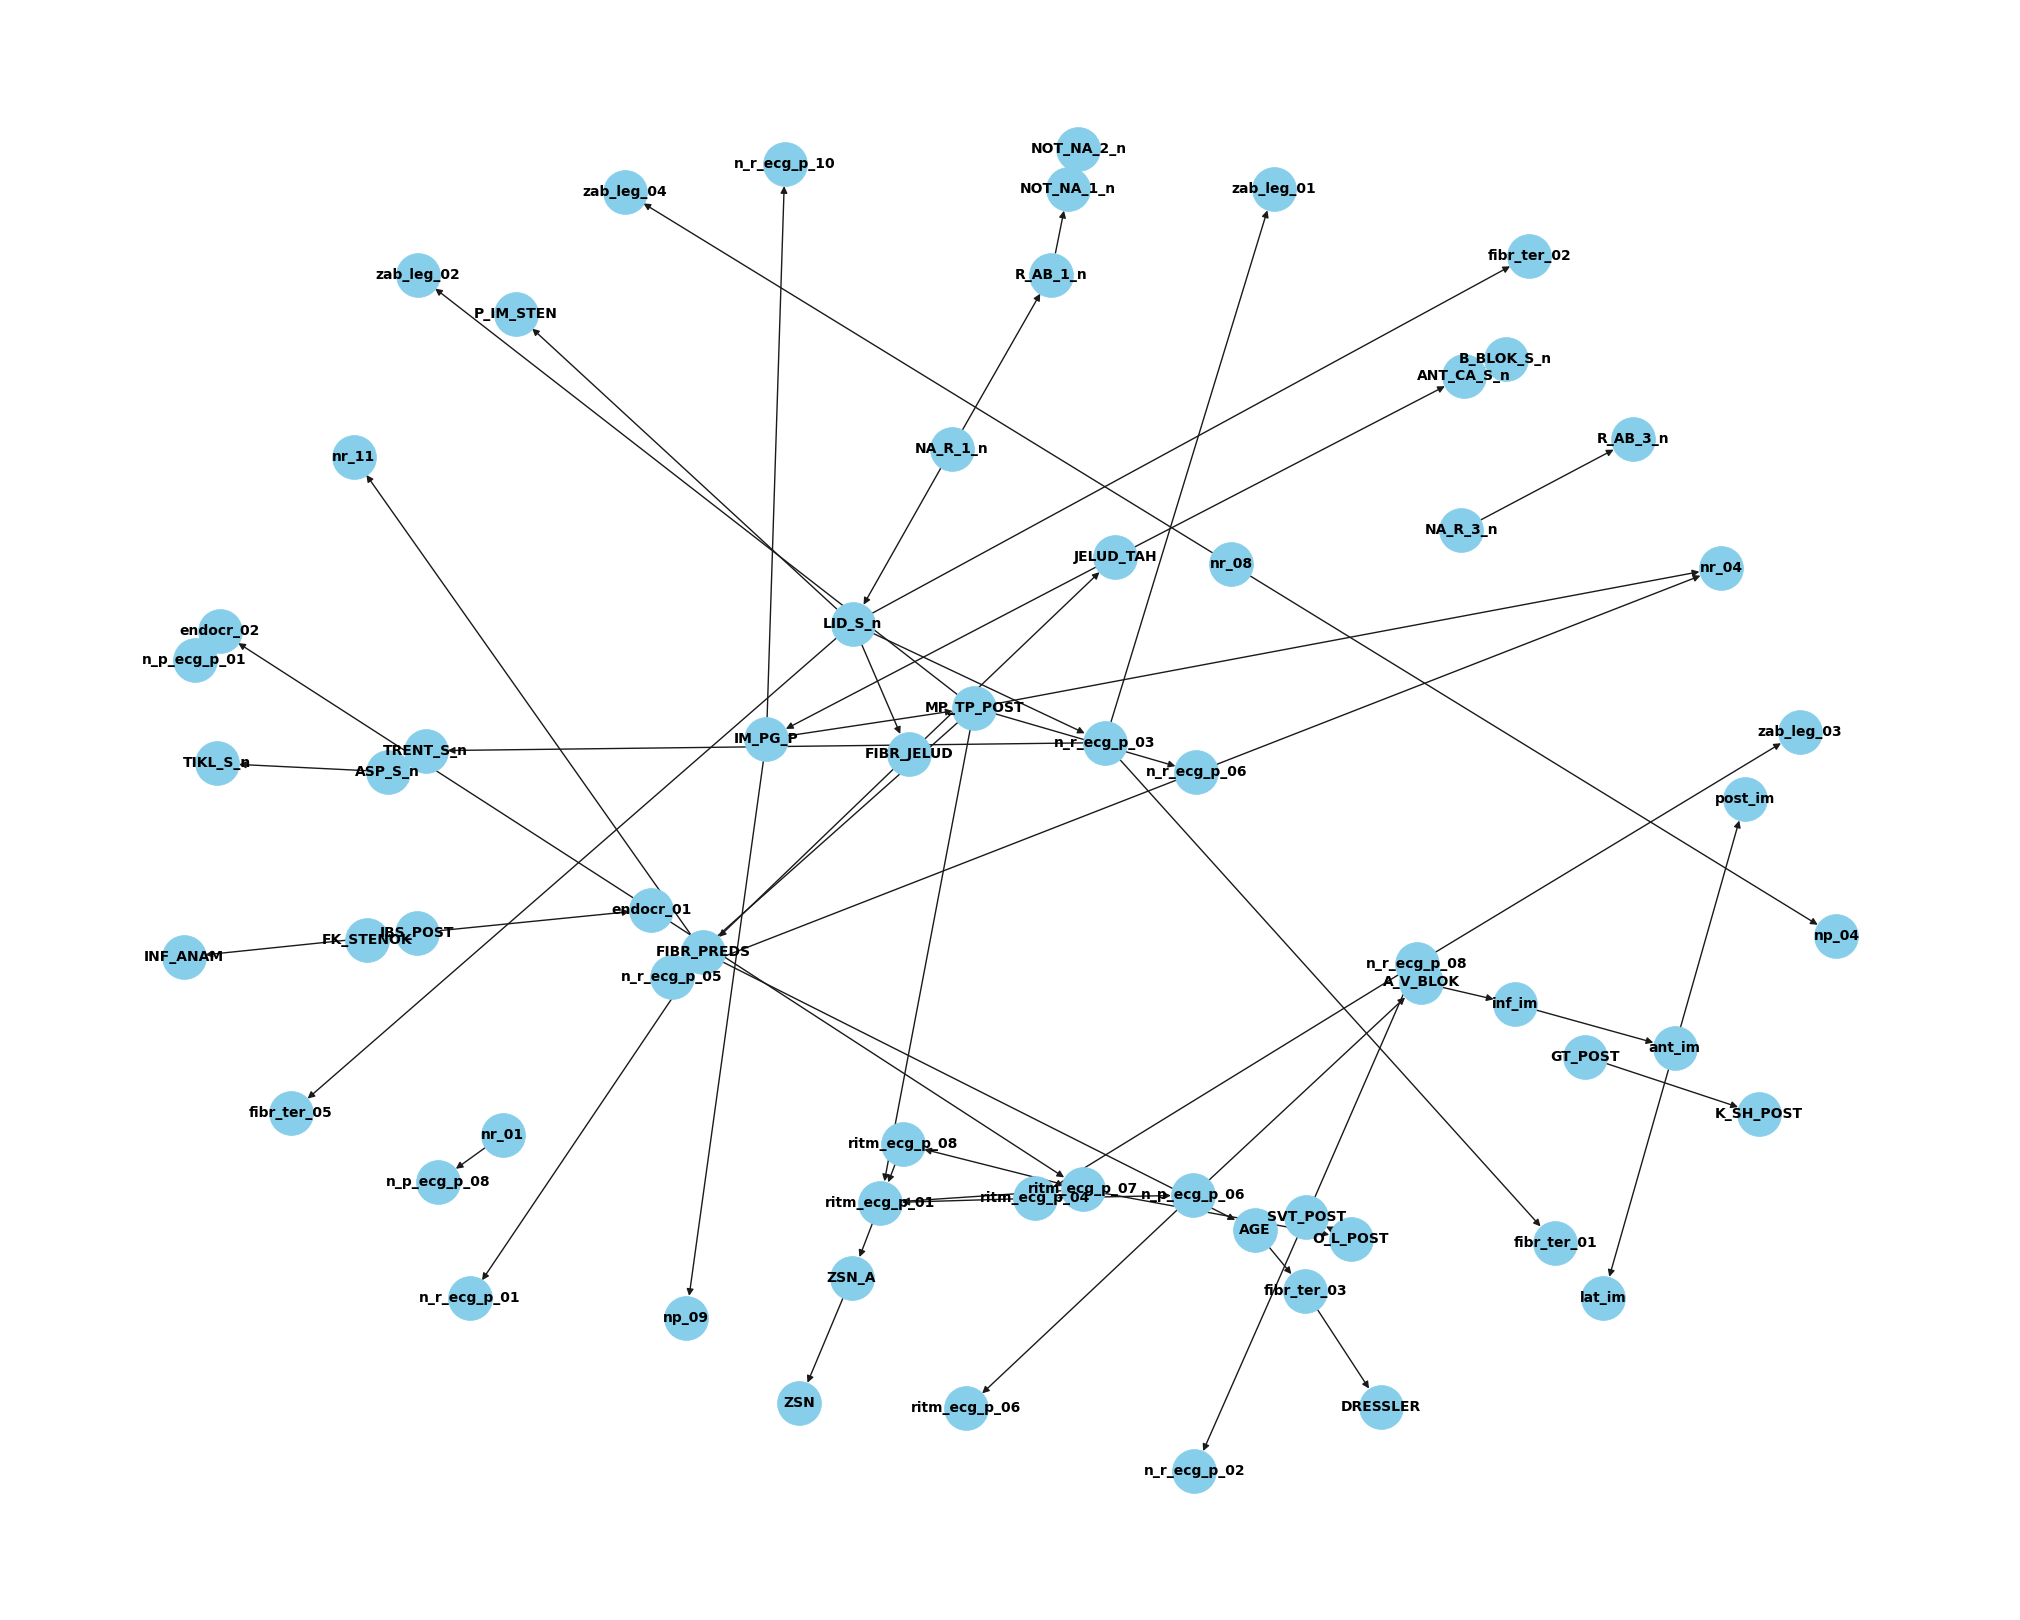

In [117]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel

# Assuming you have a Bayesian network structure in the variable 'model'
# You can create a NetworkX graph from the Bayesian model
nx_graph = nx.DiGraph()
nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())

# Create a Matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the graph
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, arrows=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', font_color='black', linewidths=0.5, width=1)

# Display the graph
plt.show()


In [118]:
for edge in model.edges():
    print(edge)

('AGE', 'fibr_ter_03')
('fibr_ter_03', 'DRESSLER')
('FK_STENOK', 'IBS_POST')
('IBS_POST', 'INF_ANAM')
('IBS_POST', 'endocr_01')
('endocr_01', 'endocr_02')
('endocr_01', 'ritm_ecg_p_07')
('ZSN_A', 'ZSN')
('nr_01', 'n_p_ecg_p_08')
('nr_08', 'np_04')
('nr_08', 'zab_leg_04')
('endocr_02', 'n_p_ecg_p_01')
('ritm_ecg_p_07', 'ritm_ecg_p_01')
('ritm_ecg_p_07', 'O_L_POST')
('ritm_ecg_p_07', 'ritm_ecg_p_08')
('O_L_POST', 'SVT_POST')
('SVT_POST', 'n_r_ecg_p_08')
('SVT_POST', 'n_r_ecg_p_02')
('MP_TP_POST', 'ritm_ecg_p_01')
('MP_TP_POST', 'n_r_ecg_p_05')
('MP_TP_POST', 'n_r_ecg_p_06')
('MP_TP_POST', 'nr_04')
('MP_TP_POST', 'zab_leg_02')
('ritm_ecg_p_01', 'ZSN_A')
('n_r_ecg_p_05', 'FIBR_PREDS')
('n_r_ecg_p_06', 'nr_04')
('n_r_ecg_p_06', 'n_r_ecg_p_05')
('n_r_ecg_p_08', 'ritm_ecg_p_04')
('n_r_ecg_p_08', 'zab_leg_03')
('GT_POST', 'K_SH_POST')
('ant_im', 'lat_im')
('ant_im', 'post_im')
('inf_im', 'ant_im')
('IM_PG_P', 'MP_TP_POST')
('IM_PG_P', 'np_09')
('IM_PG_P', 'n_r_ecg_p_10')
('ritm_ecg_p_04', 'n_p

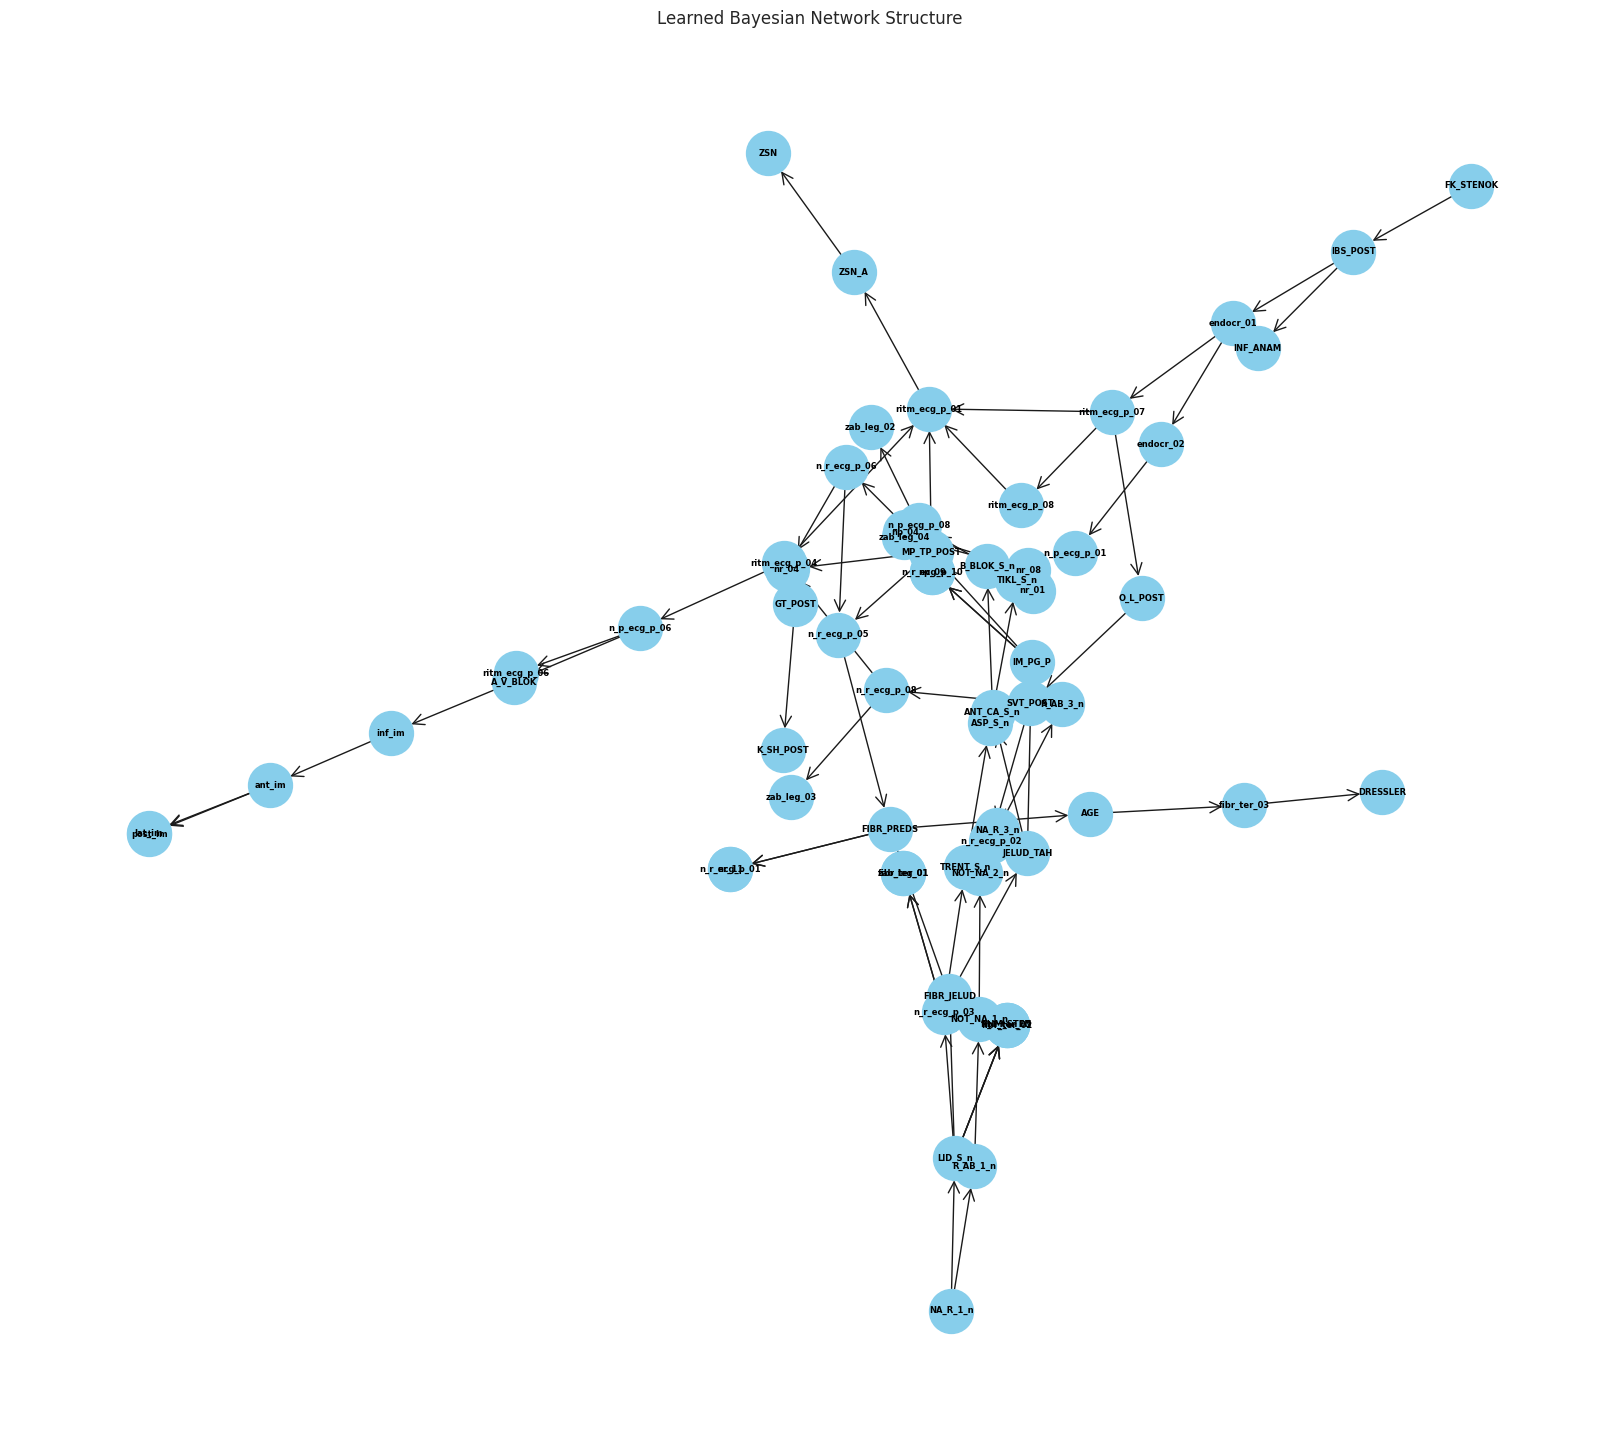

In [143]:
# Create a Directed Graph and add edges
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Use the Kamada-Kawai layout for better node spacing
pos =  nx.kamada_kawai_layout(G)

# Create the plot
plt.figure(figsize=(16, 14))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=6, font_color='black', font_weight='bold', arrowsize=20, arrowstyle='->')
plt.title("Learned Bayesian Network Structure")
plt.show()